<a href="https://colab.research.google.com/github/Gowthaam-K/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Gowthaam_Kumarasamy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
banking_df = pd.read_csv('/content/drive/MyDrive/bank-full.csv',encoding = 'utf-8',delimiter = ';') 

In [4]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
banking_df.shape

(45211, 17)

In [5]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [31]:
banking_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
banking_df.duplicated().sum()

0

In [11]:
banking_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [26]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [29]:
categorical_columns = banking_df.select_dtypes(include='object').columns
numerical_columns = banking_df.describe().columns
print(categorical_columns)
print(numerical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


# What Is a Term Deposit?
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits

# What actually drive a client to make successful term deposit?
  1. This dataset shows that out of 45,211 clients only 11.5% clients were agreed to the direct calls marketing campaign. So that it shows that the probability of success is 11.5%.
  2. There are various factors influencing the subscription of a term deposit, but age, job, marital, loans, defaults make a major impact in availing the term deposit.
     

# **Univariate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


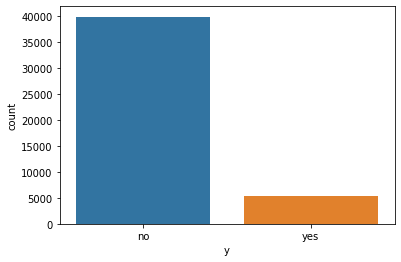

In [25]:
sns.countplot(banking_df['y'])

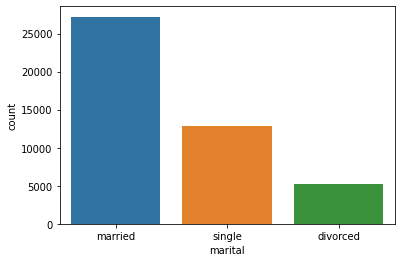

In [20]:
sns.countplot(x=banking_df['marital'],data=banking_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


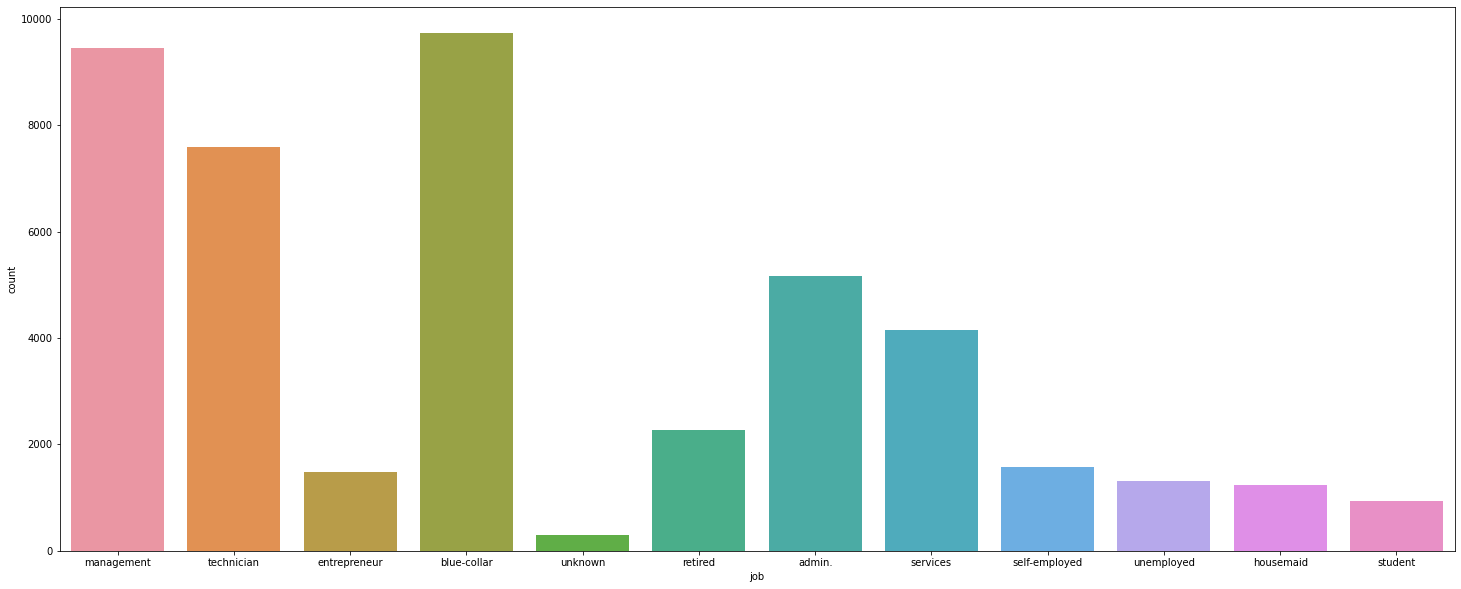

In [23]:
plt.figure(figsize = (25,10))
sns.countplot(banking_df['job'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


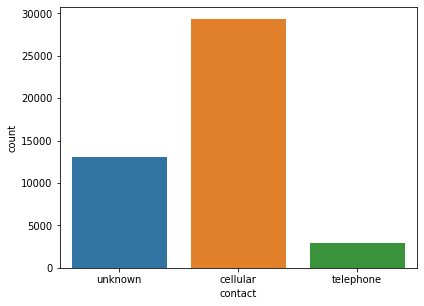

In [56]:
plt.figure(figsize = [6.4, 4.8])
sns.countplot(banking_df['contact'])

We can infer that 

1.Clients availing term deposit mostly through cellular contact, so marketing should be focussed in cellular mode

2.Clients who are reached through telephone are the least to subscribe term deposit so we should avoid telephone marketing

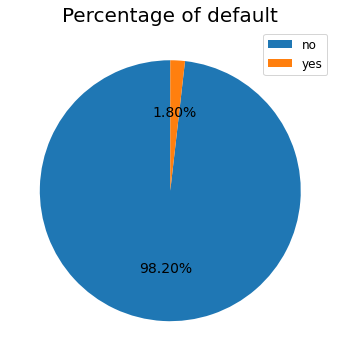

In [44]:
plt.figure(figsize=(7,6))
label = banking_df['default'].value_counts().index.tolist()
size = banking_df['default'].value_counts().tolist()
plt.pie(size,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of default', fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})



From above pie chart 98.20 % clients have not any credit default only 1.80% of clients have default in credit.

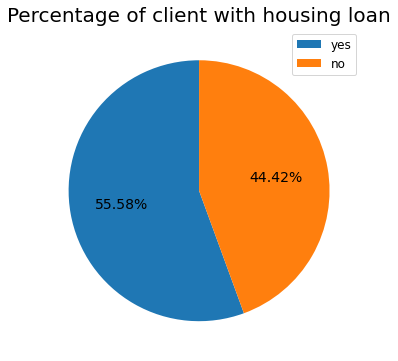

In [47]:
plt.figure(figsize=(7,6))
label = banking_df['housing'].value_counts().index.tolist()
size = banking_df['housing'].value_counts().tolist()
plt.pie(size,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of client with housing loan', fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})

55.58 % of clients having housing loan and 44.42 % clients don't have any housing loan.

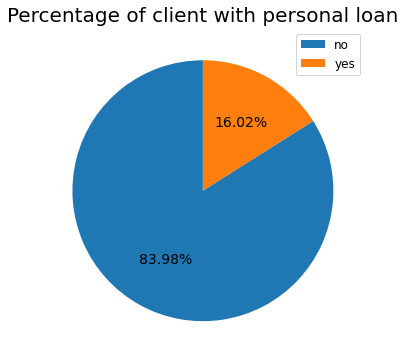

In [48]:
plt.figure(figsize=(7,6))
label = banking_df['loan'].value_counts().index.tolist()
size = banking_df['loan'].value_counts().tolist()
plt.pie(size,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of client with personal loan', fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})

83.98 % of clients having personal loan and 16.02 % clients not have any personal loan.

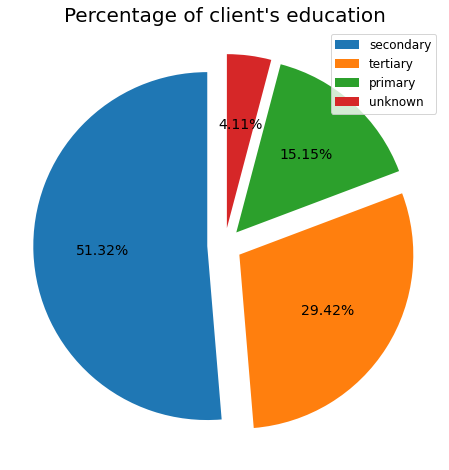

In [55]:
plt.figure(figsize=(10,8))
label = banking_df['education'].value_counts().index.tolist()
size = banking_df['education'].value_counts().tolist()
explode = (0.1,0.1,0.1,0.1)
plt.pie(size,explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title("Percentage of client's education", fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})

1.51.32 % of clients are in the category of secondary education.

2.15.15% of clients are in the category of primary education.


# **Bivariate analysis**

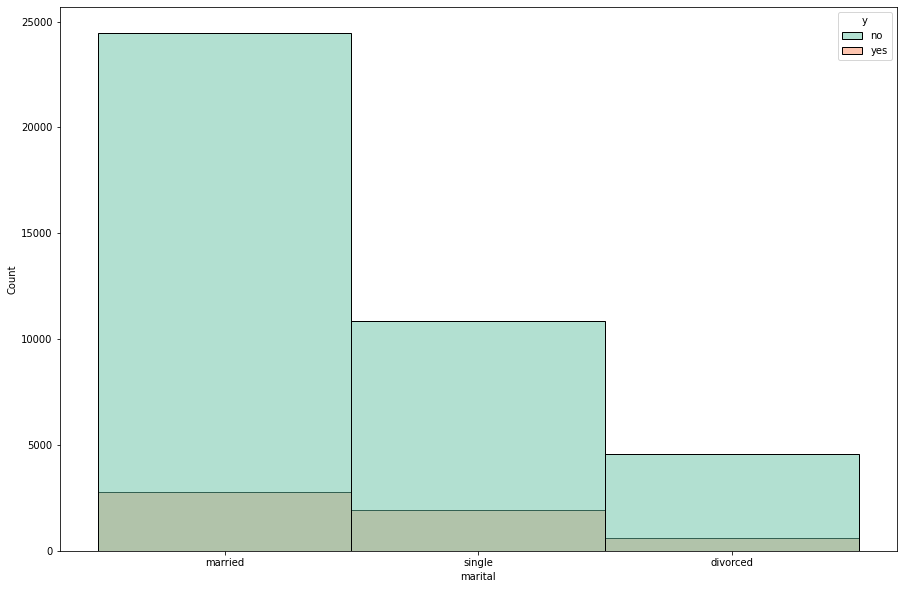

In [59]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'marital',
              data = banking_df,
              palette="Set2",hue='y')
plt.show()

It shows the subscription based on the client's marital status

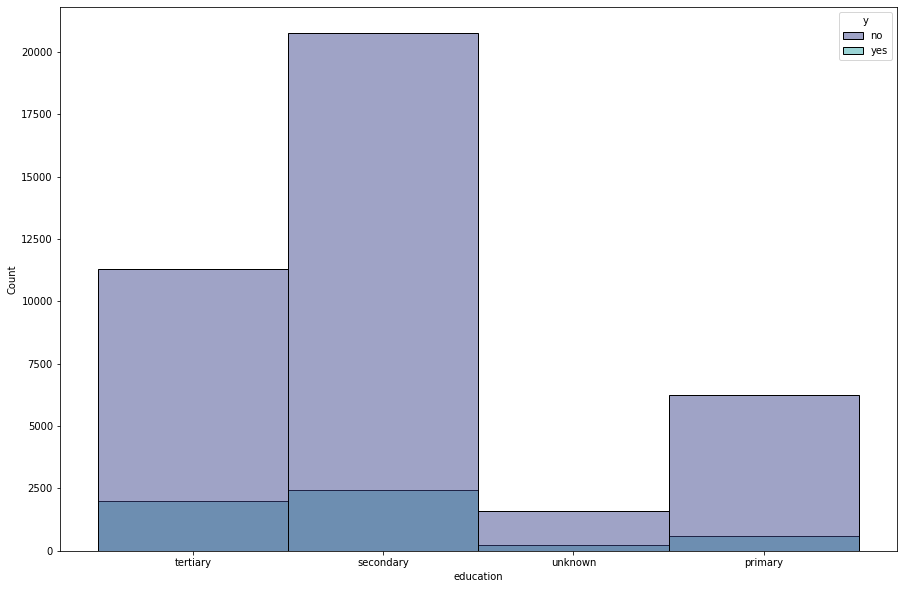

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'education',
              data = banking_df,
              palette="mako",hue='y')
plt.show()

It shows that the clients with secondary education has subscribed the term deposit most

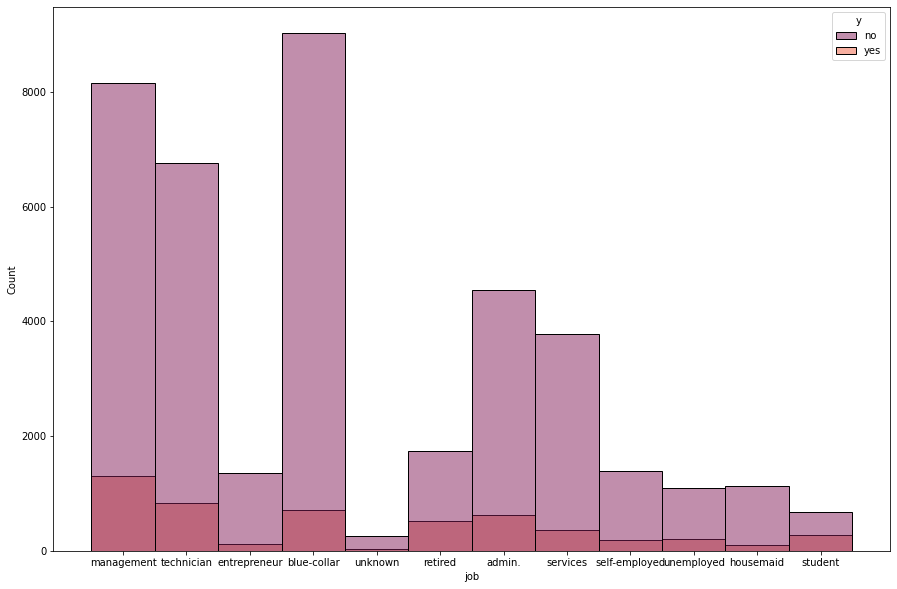

In [61]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'job',
              data = banking_df,
              palette="rocket",hue='y')
plt.show()

Through this graph we can understand that the clients with management jobs have availed term deposit most through marketing campaigns

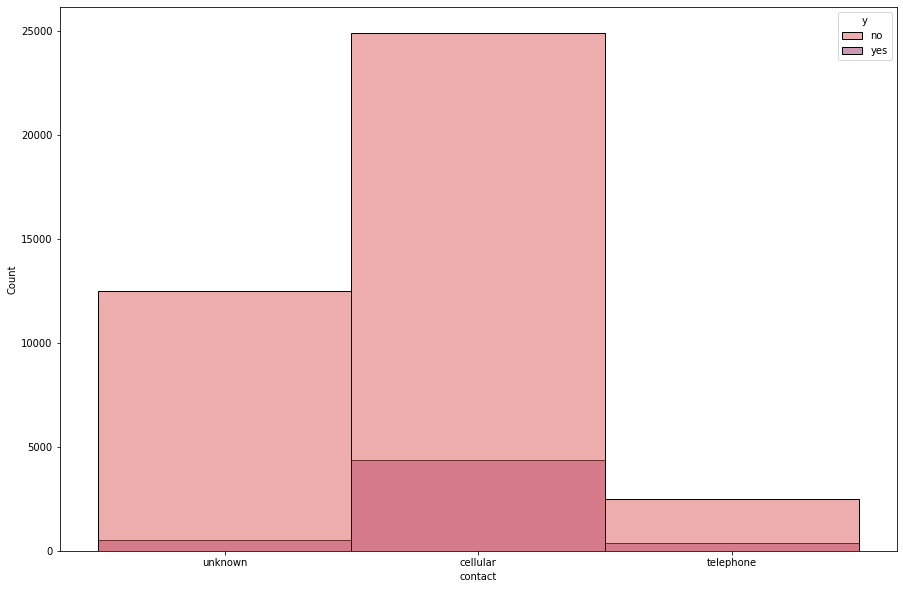

In [62]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'contact',
              data = banking_df,
              palette="flare",hue='y')
plt.show()

Marketing through cellular contact has got more subscriptions than the rest

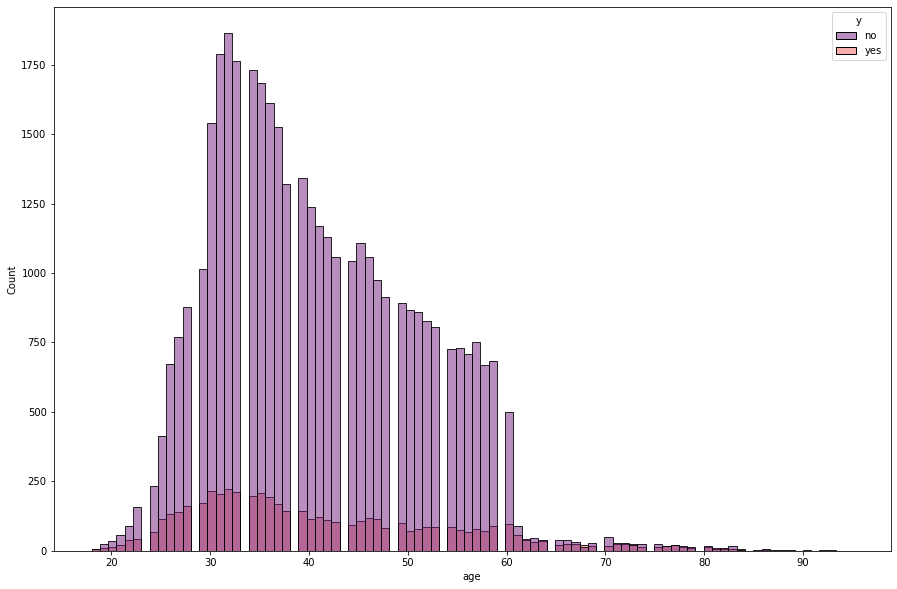

In [63]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'age',
              data = banking_df,
              palette="magma",hue='y')
plt.show()

We can conclude that from age 25 to 45 are the clients who subscribed for the term deposit

# **Feature Engineering**

In [32]:
for var in categorical_columns:
    print(var, ' contains ', len(banking_df[var].unique()), ' labels')

job  contains  12  labels
marital  contains  3  labels
education  contains  4  labels
default  contains  2  labels
housing  contains  2  labels
loan  contains  2  labels
contact  contains  3  labels
month  contains  12  labels
poutcome  contains  4  labels
y  contains  2  labels


In [33]:
banking_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

As job has 12 labels we will categorize them. 

cat_1 - working class clients

cat_2 - self_employed, entrepreneurship

cat_3 - retired

cat_4 - not working 

In [34]:
def job_category(job):
  cat_1 = ['blue-collar','management','technician','admin.','services']
  cat_2 = ['self-employed','entrepreneur']
  cat_3 = ['retired']
  cat_4 = ['unemployed','housemaid','student','unknown']

  if job in cat_1:
    return 'cat_1'
  elif job in cat_2:
    return 'cat_2'
  elif job in cat_3:
    return 'cat_3'
  elif job in cat_4:
    return 'cat_4'
  return job     

In [37]:
banking_df['job_category']=banking_df['job'].apply(job_category)

In [39]:
banking_df.drop('new_jobs',axis=1,inplace=True)

In [40]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,cat_1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,cat_1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,cat_2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,cat_1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,cat_4


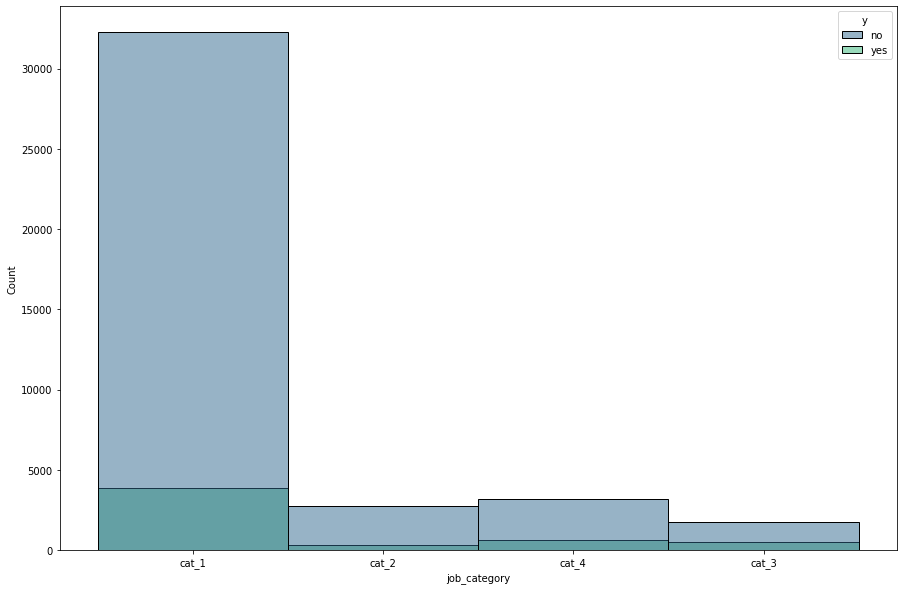

In [69]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'job_category',
              data = banking_df,
              palette="viridis",hue='y')
plt.show()

It clearly shows us that the clients with category 1 jobs have subscribed the term deposit highest and category 2 is the lowest

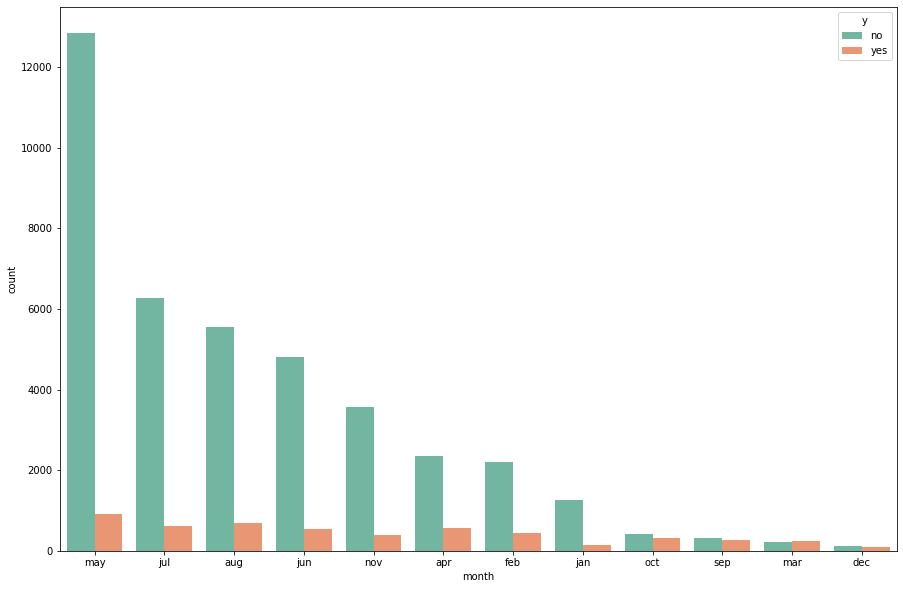

In [73]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'month',
              data = banking_df,order=banking_df['month'].value_counts().index,
              palette="Set2",hue='y')
plt.show()

It shows that in april to august are the months where clients subscribe term deposit and during october to march clients don't often subscribe 

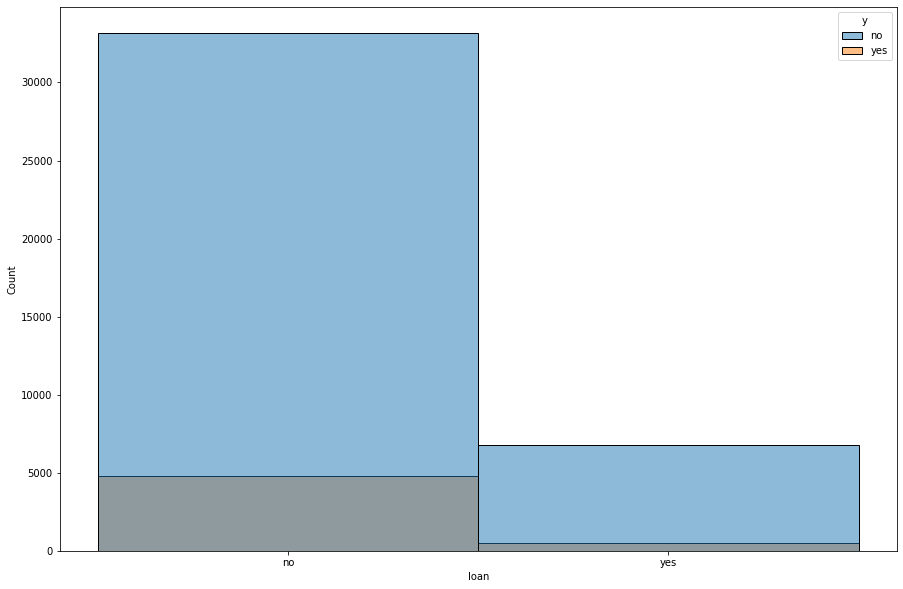

In [74]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'loan',
              data = banking_df,
              palette="tab10",hue='y')
plt.show()

This plot shows that clients who have no loans mostly take term deposit.

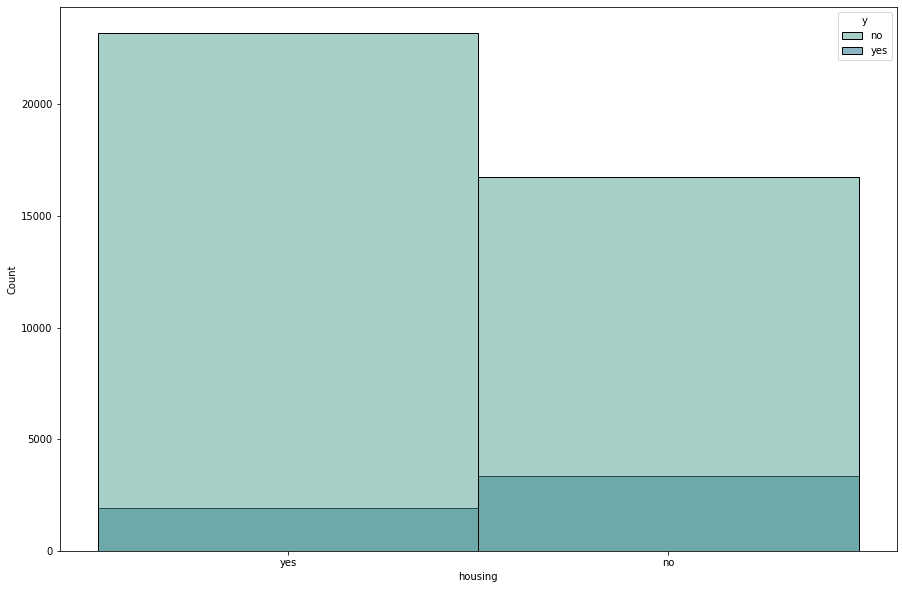

In [75]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'housing',
              data = banking_df,
              palette="crest",hue='y')
plt.show()

Clients who have no housing loans take the term deposit the most

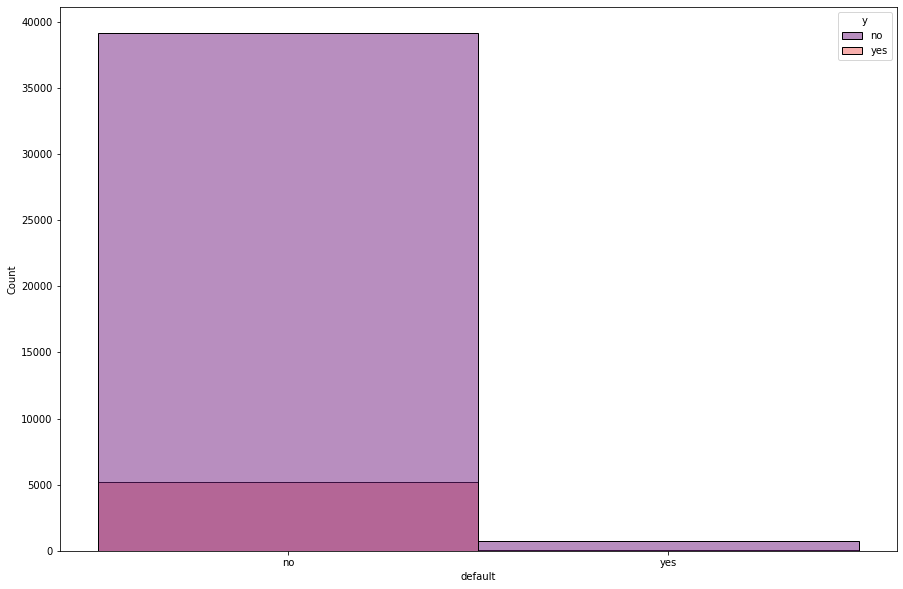

In [77]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'default',
              data = banking_df,
              palette="magma",hue='y')
plt.show()

The clients who have no default in credit have subsribed the term deposit most and who have default in credit have never took term deposit.

In [88]:
def age_category(age):
  if age < 25:
    return 'Fresher'
  elif age < 50:
    return 'Stable'
  elif age < 59 :
    return 'Retirement stage'
  elif age < 75:
    return 'old age'
  else: 
    return 'Counting last days'
 

In [89]:
banking_df['age_category'] = banking_df['age'].apply(age_category)

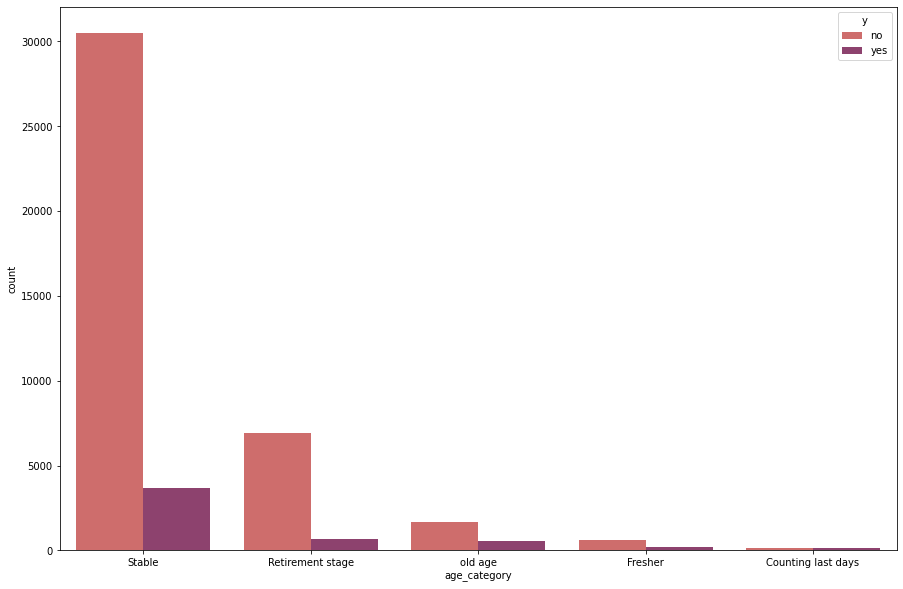

In [90]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'age_category',
              data = banking_df,order=banking_df['age_category'].value_counts().index,
              hue='y',palette="flare")
plt.show()

We can clearly depict that the clients with stable age are the ones who took term deposit the most and those who are counting last days are the least to take term deposit